In [ ]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import cv2
import mimetypes
import argparse
import imutils
import zipfile
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ignore warnings
warnings.filterwarnings('ignore')

# Unzip the dataset and save to Google Drive
with zipfile.ZipFile('/content/drive/MyDrive/clover3.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/clover3')

# Define dataset path
dataset_path = '/content/drive/MyDrive/clover3'

In [ ]:
class_names = ['Clover']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

In [ ]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [ ]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # denormalize the coordinates
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        width = xmax - xmin
        height = ymax - ymin

        class_name = class_names[int(labels[box_num])]

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        )

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))

        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        # Text width and height
        tw, th = cv2.getTextSize(
            class_name,
            0, fontScale=font_scale, thickness=font_thickness
        )[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image,
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image,
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

In [ ]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()

    num_images = len(all_training_images)

    plt.figure(figsize=(6, 6))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

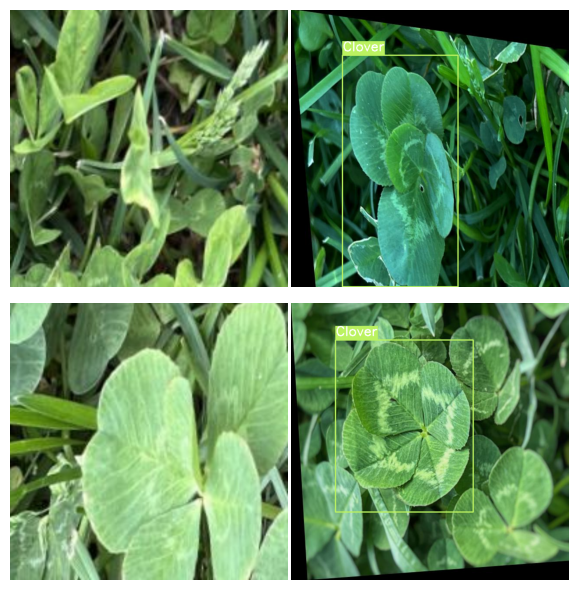

In [ ]:
# Visualize a few training images.
plot(
    image_paths='/content/drive/MyDrive/clover3/train/images/*',
    label_paths='/content/drive/MyDrive/clover3/train/labels/*',
    num_samples=4,
)

In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 20.9 MB/s eta 0:00:00


In [ ]:
TRAIN = True
# Number of epochs to train for.
EPOCHS = 50

In [ ]:
!yolo task=detect mode=train \
    model=yolov8s.pt \
    imgsz=640 \
    data=/content/drive/MyDrive/clover3/data.yaml \
    epochs={EPOCHS} \
    batch=16 \
    name=yolov8s_v8_50e \
    mosaic=1.0 \
    mixup=0.5 \
    copy_paste=0.3 \
    iou=0.5 \
    conf=0.001 \
    max_det=300 \
    patience=25 \
    save_period=10 \
    nms=True

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/clover3/data.yaml, epochs=50, time=None, patience=25, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=yolov8s_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [ ]:
!yolo task=detect mode=train \
    model=yolov8s.pt \
    imgsz=640 \
    data=/content/drive/MyDrive/clover3/data.yaml \
    epochs={EPOCHS} \
    batch=8 \
    name=yolov8s_v8_50e \
    mosaic=1.0 \
    mixup=0.5 \
    copy_paste=0.3 \
    iou=0.5 \
    conf=0.001 \
    max_det=300 \
    patience=25 \
    save_period=10 \
    nms=True

100% 21.5M/21.5M [00:00<00:00, 216MB/s]
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/clover3/data.yaml, epochs=50, time=None, patience=25, batch=8, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=yolov8s_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [ ]:
!cp -r /content/runs/detect/yolov8s_v8_50e /content/drive/MyDrive/clover3/yolov8s_model_320_50_batch_16/


In [ ]:
!yolo task=detect mode=train \
    model=yolov8s.pt \
    imgsz=320 \
    data=/content/drive/MyDrive/clover3/data.yaml \
    epochs={EPOCHS} \
    batch=8 \
    name=yolov8s_v8_50e \
    mosaic=1.0 \
    mixup=0.5 \
    copy_paste=0.3 \
    iou=0.5 \
    conf=0.001 \
    max_det=300 \
    patience=25 \
    save_period=10 \
    nms=True

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/clover3/data.yaml, epochs=50, time=None, patience=25, batch=8, imgsz=320, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=yolov8s_v8_50e2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [ ]:
!yolo task=detect mode=train \
    model=yolov8s.pt \
    imgsz=320 \
    data=/content/drive/MyDrive/clover3/data.yaml \
    epochs=50 \
    batch=16 \
    name=yolov8s_v8_50e \
    mosaic=1.0 \
    mixup=0.5 \
    copy_paste=0.3 \
    iou=0.5 \
    conf=0.001 \
    max_det=300 \
    patience=25 \
    save_period=10 \
    nms=True

Ultralytics YOLOv8.2.88 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/clover3/data.yaml, epochs=50, time=None, patience=25, batch=16, imgsz=320, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=yolov8s_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/clover3/yolov8s_model_50/weights/best.pt name=yolov8s_eval data=/content/drive/MyDrive/clover3/data.yaml


Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/clover3/valid/labels.cache... 76 images, 76 backgrounds, 0 corrupt: 100% 152/152 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:05<00:00,  1.82it/s]
                   all        152         77      0.996      0.961      0.981      0.839
Speed: 4.0ms preprocess, 13.0ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/yolov8s_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/clover3/yolov8s_model_50/weights/best.pt name=yolov8s_eval data=/content/drive/MyDrive/clover3/data1.yaml


Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 25.7MB/s]
val: Scanning /content/drive/MyDrive/clover3/test/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:10<00:00,  3.43s/it]
                   all         40         40      0.991       0.95       0.96      0.793
Speed: 9.6ms preprocess, 18.5ms inference, 0.0ms loss, 29.5ms postprocess per image
Results saved to runs/detect/yolov8s_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!cp -r /content/runs/detect/yolov8s_eval2 /content/drive/MyDrive/clover3/yolov8s_model_50/evaluation2/


In [ ]:
!yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/clover3/yolov8s_model_50/weights/best.pt \
source=/content/drive/MyDrive/clover3/test/images \
imgsz=640 \
name=yolov8s_eval \
data=/content/drive/MyDrive/clover3/data.yaml \
show_labels=True \
save_txt=True \
save_conf=True

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/40 /content/drive/MyDrive/clover3/test/images/11126_jpg.rf.100d16a1fd7d2482d947b9a7fad365a5.jpg: 640x640 1 Clover, 16.2ms
image 2/40 /content/drive/MyDrive/clover3/test/images/11886_jpg.rf.999e8e81dcdf93d3c92419f4f9bbbdd6.jpg: 640x640 1 Clover, 16.3ms
image 3/40 /content/drive/MyDrive/clover3/test/images/12256_jpg.rf.1b308bd6918cce53038a45e6d20a0284.jpg: 640x640 2 Clovers, 16.2ms
image 4/40 /content/drive/MyDrive/clover3/test/images/1255_jpg.rf.fdfb5f93c41640cbd8d145e2a88c48f9.jpg: 640x640 1 Clover, 16.2ms
image 5/40 /content/drive/MyDrive/clover3/test/images/13202_jpg.rf.7c8814885a16750479617aed355229dd.jpg: 640x640 1 Clover, 16.2ms
image 6/40 /content/drive/MyDrive/clover3/test/images/13528_jpg.rf.d8c8eb03f7bd0d1e7920c0ae166cd34e.jpg: 640x640 (no detections), 16.2ms
image 7/40 /content/drive/MyDrive/clover3/

In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(6, 6))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

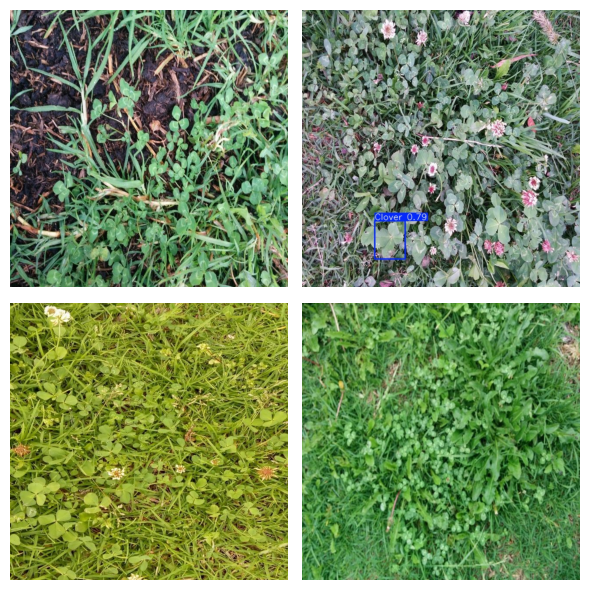

In [ ]:
visualize('runs/detect/yolov8s_eval5')

In [ ]:
!cp -r /content/runs/detect/yolov8s_eval4 /content/drive/MyDrive/clover3/yolov8s_model_50/prediction2/


In [ ]:
import os
import pandas as pd

# Define the path to the directory containing the prediction results
result_dir = '/content/runs/detect/yolov8s_eval4'
labels_dir = os.path.join(result_dir, 'labels')

# Initialize a list to store the bounding box information
bbox_data = []

# Iterate through the text files in the labels directory
for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(labels_dir, label_file)
        image_name = label_file.replace('.txt', '.jpg')

        # Read the content of the label file
        with open(label_path, 'r') as file:
            lines = file.readlines()

        # Extract bounding box coordinates and labels
        for line in lines:
            parts = line.strip().split()
            label = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            confidence = float(parts[5]) if len(parts) > 5 else 0.0

            # Calculate xmin, ymin, xmax, ymax
            xmin = int((x_center - width/2) * 640)  # Assuming image width is 640
            ymin = int((y_center - height/2) * 640)  # Assuming image height is 640
            xmax = int((x_center + width/2) * 640)
            ymax = int((y_center + height/2) * 640)

            # Append the data to the list
            bbox_data.append([image_name, xmin, ymin, xmax, ymax, confidence])

# Create a DataFrame from the list
bbox_df = pd.DataFrame(bbox_data, columns=['filename', 'xmin', 'ymin', 'xmax', 'ymax','confidence'])

# Save the DataFrame to a CSV file
csv_path = os.path.join(result_dir, 'pboxes_yolo_single2.csv')
bbox_df.to_csv(csv_path, index=False)

print(f"Predicted bounding boxes saved to {csv_path}")

Predicted bounding boxes saved to /content/runs/detect/yolov8s_eval4/pboxes_yolo_single2.csv


In [ ]:
!cp -r /content/runs/detect/yolov8s_eval4/pboxes_yolo_single2.csv /content/drive/MyDrive/clover3/yolov8s_model_50/prediction2/

In [ ]:
!yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/clover3/yolov8s_model_50/weights/best.pt \
source=/content/drive/MyDrive/test_2108 \
imgsz=640 \
name=yolov8s_eval \
data=/content/drive/MyDrive/clover3/data.yaml \
show_labels=True \
save_txt=True \
save_conf=True

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/80 /content/drive/MyDrive/test_2108/1005_jpg.rf.c38450024a465c7a7ef2e23f37e70c4c.jpg: 640x640 1 Clover, 16.3ms
image 2/80 /content/drive/MyDrive/test_2108/11126_jpg.rf.100d16a1fd7d2482d947b9a7fad365a5.jpg: 640x640 1 Clover, 16.3ms
image 3/80 /content/drive/MyDrive/test_2108/11595_jpg.rf.fc98910c5a14d5ad61a071fbe4569ea2.jpg_crop_4.jpg: 640x640 (no detections), 16.3ms
image 4/80 /content/drive/MyDrive/test_2108/11886_jpg.rf.999e8e81dcdf93d3c92419f4f9bbbdd6.jpg: 640x640 1 Clover, 16.2ms
image 5/80 /content/drive/MyDrive/test_2108/12256_jpg.rf.1b308bd6918cce53038a45e6d20a0284.jpg: 640x640 2 Clovers, 16.3ms
image 6/80 /content/drive/MyDrive/test_2108/12278_jpg.rf.8e9a0cde3a9c96356d2cc16efdb71d84.jpg_crop_0.jpg: 640x640 (no detections), 16.3ms
image 7/80 /content/drive/MyDrive/test_2108/12278_jpg.rf.8e9a0cde3a9c9635

In [ ]:
!cp -r /content/runs/detect/yolov8s_eval /content/drive/MyDrive/clover3/evaluation_test


In [ ]:
import os
import pandas as pd

# Define the path to the directory containing the prediction results
result_dir = '/content/runs/detect/yolov8n_eval2'
labels_dir = os.path.join(result_dir, 'labels')

# Initialize a list to store the bounding box information
bbox_data = []

# Iterate through the text files in the labels directory
for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(labels_dir, label_file)
        image_name = label_file.replace('.txt', '.jpg')

        # Read the content of the label file
        with open(label_path, 'r') as file:
            lines = file.readlines()

        # Extract bounding box coordinates and labels
        for line in lines:
            parts = line.strip().split()
            label = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            confidence = float(parts[5]) if len(parts) > 5 else 0.0

            # Append the data to the list
            bbox_data.append([image_name, label, x_center, y_center, width, height, confidence])

# Create a DataFrame from the list
bbox_df = pd.DataFrame(bbox_data, columns=['image', 'label', 'x_center', 'y_center', 'width', 'height', 'confidence'])

# Save the DataFrame to a CSV file
csv_path = os.path.join(result_dir, 'predicted_bboxes.csv')
bbox_df.to_csv(csv_path, index=False)

print(f"Predicted bounding boxes saved to {csv_path}")


Predicted bounding boxes saved to /content/runs/detect/yolov8n_eval2/predicted_bboxes.csv
